In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "/home/gy46/")

In [2]:
import numpy as np
import os.path as osp

from latent_3d_points.src.evaluation_metrics import minimum_mathing_distance, \
jsd_between_point_cloud_sets, coverage

from latent_3d_points.src.in_out import snc_category_to_synth_id,\
                                        load_all_point_clouds_under_folder

Load some point-clouds and make two sets (sample_pcs, ref_pcs) from them. The ref_pcs is considered as the __ground-truth__ data while the sample_pcs corresponds to a set that is matched against it, e.g. comes from a generative model.

In [3]:
# top_in_dir = '../data/shape_net_core_uniform_samples_2048/' # Top-dir of where point-clouds are stored.
# top_in_dir = '../data/ShapeNetV1PCOutput/' # Top-dir of where point-clouds are stored.
top_in_dir = '../data/ShapeNetCore.v2.PC15k/'
class_name = 'chair'
syn_id = snc_category_to_synth_id()[class_name]
class_dir = osp.join(top_in_dir , syn_id, 'val')
# all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)
all_pc_data = load_all_point_clouds_under_folder(
    class_dir, n_threads=8, file_ending='.npy', verbose=True, normalize=True, rotation_axis=1)

Give me the class name (e.g. "chair"): chair
662 pclouds were loaded. They belong in 1 shape-classes.


In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_3d(pcl, axis=[0,1,2]):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pcl[:,axis[0]], pcl[:,axis[1]], pcl[:,axis[2]], s=1)

    ax.set_xlabel('axis-0')
    ax.set_ylabel('axis-1')
    ax.set_zlabel('axis-2')
    plt.show()

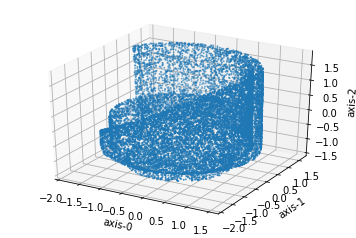

In [5]:
from random import choice
pcls, _, _ = all_pc_data.next_batch(100)
plot_3d(pcls[choice(range(pcls.shape[0]))], axis=[0,2,1])

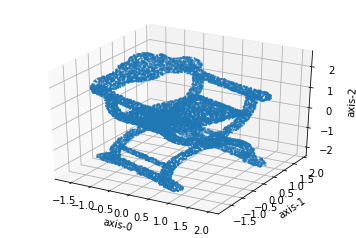

100 pclouds were loaded. They belong in 1 shape-classes.


In [9]:

top_in_dir = '../data/ModelNet40.PC15k/'
# class_name = raw_input('Give me the class name (e.g. "chair"): ').lower()
class_name = "chair"
class_dir = osp.join(top_in_dir , class_name, 'test')
# all_pc_data = load_all_point_clouds_under_folder(class_dir, n_threads=8, file_ending='.ply', verbose=True)
all_pc_data = load_all_point_clouds_under_folder(
    class_dir, n_threads=8, file_ending='.npy', verbose=True, normalize=True, rotation_axis=1)

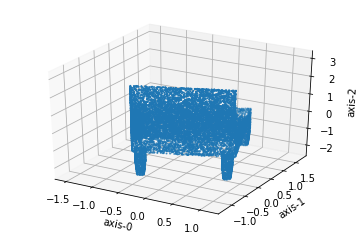

In [8]:
from random import choice
pcls, _, _ = all_pc_data.next_batch(100)
plot_3d(pcls[choice(range(pcls.shape[0]))], axis=[0,2,1])